# Telecommunications

## Plans Description

*Smart*

1. Monthly charge: 550 RUB.
2. 500 monthly minutes, 50 texts and 15 GB of data.
3. After exceeding the package limits:
    - 1 minute: 3 RUB ("Megaline" always rounds up the minute and megabyte values. If the call lasted just one second, it will be counted as one minute).
    - 1 text message: 3 RUB.
    - 1 GB of data: 200 RUB.

*Ultra*

1. Monthly charge: 1950 RUB.
2. 3000 monthly minutes, 1000 text messages, and 30 GB of data.
3. After exceeding the package limits:
    - 1 minute: 1 RUB.
    - 1 text messgae: 1 RUB.
    - 1 GB of web traffic: 150 RUB.


## Table of contents

I. General Information. Interim conclusions.

II. Data preprocessing. Interim conclusions.

- Changing the data type.
- Categorical data processing.
- Numerical data processing.

III. Dataframe editing (calculation monthly revenue from each user).

IV. Exploratory Data Analysis (EDA).

- Minutes used histograms (Smart and Ultra clients).
- Messages used histograms (Smart and Ultra clients).
- Data used histograms (Smart and Ultra clients).
- Interim conclusions.

V. Hypotheses Testing.
- Average revenue per month vary across Utra and Smart clients.
- Interim conclusions.
-  Average revenue per month vary across clients from Moscow and from regions.
- Interim conclusions.


VI. General conclusion.

In [1]:
# libraries import
import pandas as pd
import numpy as np
import seaborn as sns
from datetime import datetime, timedelta
import matplotlib.pyplot as plt
import os
from scipy import stats as st

In [2]:
# seaborn customization
sns.set(rc={'figure.figsize':(10,10)})
sns.set_theme(style='whitegrid', palette='dark')

In [3]:
# pandas customization
pd.set_option('display.float_format', '{:,.2f}'.format)

In [4]:
# reading the files and saving it to the variables
try:
    calls = pd.read_csv('/home/yuso/jupyter_dir/jupyter_env/datasets/telecom/calls.csv')
    internet = pd.read_csv('/home/yuso/jupyter_dir/jupyter_env/datasets/telecom/internet.csv')
    messages = pd.read_csv('/home/yuso/jupyter_dir/jupyter_env/datasets/telecom/messages.csv')
    tariffs = pd.read_csv('/home/yuso/jupyter_dir/jupyter_env/datasets/telecom/tariffs.csv')
    users = pd.read_csv('/home/yuso/jupyter_dir/jupyter_env/datasets/telecom/users.csv')
except:
    calls = pd.read_csv('/datasets/calls.csv')
    internet = pd.read_csv('/datasets/internet.csv')
    messages = pd.read_csv('/datasets/messages.csv')
    tariffs = pd.read_csv('/datasets/tariffs.csv')
    users = pd.read_csv('/datasets/users.csv')

In [5]:
# custom function for primary data analysis 
def get_info(df):
    percentiles= [.20, .40, .60, .80]
    include=['object', 'float', 'int']
    print(f'\033[0;37;40m Total number of rows: \033[0;0m {df.shape[0]} rows\n \n\033[0;37;40m Total number of columns: \033[0;0m {df.shape[1]} columns\n')
    print('\033[4;37;40m GENERAL INFORMATION \033[0;0m')
    print(df.info(memory_usage='deep'))
    print('\n\033[0;37;40m Top 5 rows: \033[0;0m')
    display(df.head())
    print('\n\033[0;37;40m Last 5 rows: \033[0;0m')
    display(df.tail())
    print('\n\033[0;37;40m Missing values ratio: \033[0;0m')
    print(round(table.isnull().mean() * 100, 2))
    print('\n\033[2;37;40m Duplicates ratio \033[0;0m', '  ', round(table.duplicated().mean() * 100, 2), ' %')
    print('\n\033[0;37;40m Numerical and categorical data summary: \033[0;0m')
    display(pd.DataFrame(df.describe(percentiles = percentiles, include = include).T))

In [6]:
# primary data analysis 
tables = [calls, internet, messages, tariffs, users]
names = ['calls', 'internet', 'messages', 'tariffs', 'users']

for name, table in zip(names, tables):
    print(
        f'\n\033[1;30;47m_____________SET:  {name.upper()}_____________\033[0;0m\n')
    get_info(table)
    print ('\n\033[01;30;47m_____________THE END_____________\033[0;0m\n\n') 


_____________SET:  CALLS_____________

 Total number of rows:  202607 rows
 
 Total number of columns:  4 columns

 GENERAL INFORMATION 
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 202607 entries, 0 to 202606
Data columns (total 4 columns):
 #   Column     Non-Null Count   Dtype  
---  ------     --------------   -----  
 0   id         202607 non-null  object 
 1   call_date  202607 non-null  object 
 2   duration   202607 non-null  float64
 3   user_id    202607 non-null  int64  
dtypes: float64(1), int64(1), object(2)
memory usage: 28.6 MB
None

 Top 5 rows: 


,id,call_date,duration,user_id
0,1000_0,2018-07-25,0.00,1000
1,1000_1,2018-08-17,0.00,1000
2,1000_2,2018-06-11,2.85,1000
3,1000_3,2018-09-21,13.80,1000
4,1000_4,2018-12-15,5.18,1000



 Last 5 rows: 


,id,call_date,duration,user_id
202602,1499_215,2018-12-26,0.76,1499
202603,1499_216,2018-10-18,18.83,1499
202604,1499_217,2018-11-10,10.81,1499
202605,1499_218,2018-10-06,4.27,1499
202606,1499_219,2018-12-14,19.62,1499



 Missing values ratio: 
id          0.00
call_date   0.00
duration    0.00
user_id     0.00
dtype: float64

 Duplicates ratio     0.0  %

 Numerical and categorical data summary: 


,count,unique,top,freq,mean,std,min,20%,40%,50%,60%,80%,max
id,202607,202607,1000_0,1,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
call_date,202607,365,2018-12-31,1435,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
duration,"202,607.00",NaN,NaN,NaN,6.76,5.84,0.00,0.12,4.23,6.00,7.77,11.88,38.00
user_id,"202,607.00",NaN,NaN,NaN,"1,253.94",144.72,"1,000.00","1,100.00","1,201.00","1,260.00","1,314.00","1,397.00","1,499.00"



_____________THE END_____________



_____________SET:  INTERNET_____________

 Total number of rows:  149396 rows
 
 Total number of columns:  5 columns

 GENERAL INFORMATION 
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 149396 entries, 0 to 149395
Data columns (total 5 columns):
 #   Column        Non-Null Count   Dtype  
---  ------        --------------   -----  
 0   Unnamed: 0    149396 non-null  int64  
 1   id            149396 non-null  object 
 2   mb_used       149396 non-null  float64
 3   session_date  149396 non-null  object 
 4   user_id       149396 non-null  int64  
dtypes: float64(1), int64(2), object(2)
memory usage: 22.2 MB
None

 Top 5 rows: 


,Unnamed: 0,id,mb_used,session_date,user_id
0,0,1000_0,112.95,2018-11-25,1000
1,1,1000_1,"1,052.81",2018-09-07,1000
2,2,1000_2,"1,197.26",2018-06-25,1000
3,3,1000_3,550.27,2018-08-22,1000
4,4,1000_4,302.56,2018-09-24,1000



 Last 5 rows: 


,Unnamed: 0,id,mb_used,session_date,user_id
149391,149391,1499_152,318.90,2018-10-03,1499
149392,149392,1499_153,490.13,2018-12-14,1499
149393,149393,1499_154,0.00,2018-10-27,1499
149394,149394,1499_155,"1,246.32",2018-11-26,1499
149395,149395,1499_156,544.37,2018-10-26,1499



 Missing values ratio: 
Unnamed: 0     0.00
id             0.00
mb_used        0.00
session_date   0.00
user_id        0.00
dtype: float64

 Duplicates ratio     0.0  %

 Numerical and categorical data summary: 


,count,unique,top,freq,mean,std,min,20%,40%,50%,60%,80%,max
Unnamed: 0,"149,396.00",NaN,NaN,NaN,"74,697.50","43,127.05",0.00,"29,879.00","59,758.00","74,697.50","89,637.00","119,516.00","149,395.00"
id,149396,149396,1000_0,1,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
mb_used,"149,396.00",NaN,NaN,NaN,370.19,278.30,0.00,86.18,270.05,348.01,427.77,611.97,"1,724.83"
session_date,149396,365,2018-12-31,1057,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
user_id,"149,396.00",NaN,NaN,NaN,"1,252.10",144.05,"1,000.00","1,104.00","1,203.00","1,251.00","1,302.00","1,403.00","1,499.00"



_____________THE END_____________



_____________SET:  MESSAGES_____________

 Total number of rows:  123036 rows
 
 Total number of columns:  3 columns

 GENERAL INFORMATION 
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 123036 entries, 0 to 123035
Data columns (total 3 columns):
 #   Column        Non-Null Count   Dtype 
---  ------        --------------   ----- 
 0   id            123036 non-null  object
 1   message_date  123036 non-null  object
 2   user_id       123036 non-null  int64 
dtypes: int64(1), object(2)
memory usage: 16.4 MB
None

 Top 5 rows: 


,id,message_date,user_id
0,1000_0,2018-06-27,1000
1,1000_1,2018-10-08,1000
2,1000_2,2018-08-04,1000
3,1000_3,2018-06-16,1000
4,1000_4,2018-12-05,1000



 Last 5 rows: 


,id,message_date,user_id
123031,1499_179,2018-12-12,1499
123032,1499_180,2018-09-28,1499
123033,1499_181,2018-09-27,1499
123034,1499_182,2018-11-15,1499
123035,1499_183,2018-11-16,1499



 Missing values ratio: 
id             0.00
message_date   0.00
user_id        0.00
dtype: float64

 Duplicates ratio     0.0  %

 Numerical and categorical data summary: 


,count,unique,top,freq,mean,std,min,20%,40%,50%,60%,80%,max
id,123036,123036,1000_0,1,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
message_date,123036,364,2018-12-31,859,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
user_id,"123,036.00",NaN,NaN,NaN,"1,256.99",143.52,"1,000.00","1,102.00","1,217.00","1,271.00","1,311.00","1,402.00","1,499.00"



_____________THE END_____________



_____________SET:  TARIFFS_____________

 Total number of rows:  2 rows
 
 Total number of columns:  8 columns

 GENERAL INFORMATION 
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2 entries, 0 to 1
Data columns (total 8 columns):
 #   Column                 Non-Null Count  Dtype 
---  ------                 --------------  ----- 
 0   messages_included      2 non-null      int64 
 1   mb_per_month_included  2 non-null      int64 
 2   minutes_included       2 non-null      int64 
 3   rub_monthly_fee        2 non-null      int64 
 4   rub_per_gb             2 non-null      int64 
 5   rub_per_message        2 non-null      int64 
 6   rub_per_minute         2 non-null      int64 
 7   tariff_name            2 non-null      object
dtypes: int64(7), object(1)
memory usage: 364.0 bytes
None

 Top 5 rows: 


,messages_included,mb_per_month_included,minutes_included,rub_monthly_fee,rub_per_gb,rub_per_message,rub_per_minute,tariff_name
0,50,15360,500,550,200,3,3,smart
1,1000,30720,3000,1950,150,1,1,ultra



 Last 5 rows: 


,messages_included,mb_per_month_included,minutes_included,rub_monthly_fee,rub_per_gb,rub_per_message,rub_per_minute,tariff_name
0,50,15360,500,550,200,3,3,smart
1,1000,30720,3000,1950,150,1,1,ultra



 Missing values ratio: 
messages_included       0.00
mb_per_month_included   0.00
minutes_included        0.00
rub_monthly_fee         0.00
rub_per_gb              0.00
rub_per_message         0.00
rub_per_minute          0.00
tariff_name             0.00
dtype: float64

 Duplicates ratio     0.0  %

 Numerical and categorical data summary: 


,count,unique,top,freq,mean,std,min,20%,40%,50%,60%,80%,max
messages_included,2.00,NaN,NaN,NaN,525.00,671.75,50.00,240.00,430.00,525.00,620.00,810.00,"1,000.00"
mb_per_month_included,2.00,NaN,NaN,NaN,"23,040.00","10,861.16","15,360.00","18,432.00","21,504.00","23,040.00","24,576.00","27,648.00","30,720.00"
minutes_included,2.00,NaN,NaN,NaN,"1,750.00","1,767.77",500.00,"1,000.00","1,500.00","1,750.00","2,000.00","2,500.00","3,000.00"
rub_monthly_fee,2.00,NaN,NaN,NaN,"1,250.00",989.95,550.00,830.00,"1,110.00","1,250.00","1,390.00","1,670.00","1,950.00"
rub_per_gb,2.00,NaN,NaN,NaN,175.00,35.36,150.00,160.00,170.00,175.00,180.00,190.00,200.00
rub_per_message,2.00,NaN,NaN,NaN,2.00,1.41,1.00,1.40,1.80,2.00,2.20,2.60,3.00
rub_per_minute,2.00,NaN,NaN,NaN,2.00,1.41,1.00,1.40,1.80,2.00,2.20,2.60,3.00
tariff_name,2,2,smart,1,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN



_____________THE END_____________



_____________SET:  USERS_____________

 Total number of rows:  500 rows
 
 Total number of columns:  8 columns

 GENERAL INFORMATION 
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 500 entries, 0 to 499
Data columns (total 8 columns):
 #   Column      Non-Null Count  Dtype 
---  ------      --------------  ----- 
 0   user_id     500 non-null    int64 
 1   age         500 non-null    int64 
 2   churn_date  38 non-null     object
 3   city        500 non-null    object
 4   first_name  500 non-null    object
 5   last_name   500 non-null    object
 6   reg_date    500 non-null    object
 7   tariff      500 non-null    object
dtypes: int64(2), object(6)
memory usage: 229.6 KB
None

 Top 5 rows: 


,user_id,age,churn_date,city,first_name,last_name,reg_date,tariff
0,1000,52,NaN,Краснодар,Рафаил,Верещагин,2018-05-25,ultra
1,1001,41,NaN,Москва,Иван,Ежов,2018-11-01,smart
2,1002,59,NaN,Стерлитамак,Евгений,Абрамович,2018-06-17,smart
3,1003,23,NaN,Москва,Белла,Белякова,2018-08-17,ultra
4,1004,68,NaN,Новокузнецк,Татьяна,Авдеенко,2018-05-14,ultra



 Last 5 rows: 


,user_id,age,churn_date,city,first_name,last_name,reg_date,tariff
495,1495,65,NaN,Иркутск,Авксентий,Фокин,2018-08-28,ultra
496,1496,36,NaN,Вологда,Трифон,Блохин,2018-01-27,smart
497,1497,32,NaN,Челябинск,Каролина,Агеева,2018-10-09,smart
498,1498,68,2018-10-25,Владикавказ,Всеволод,Акимчин,2018-07-19,smart
499,1499,35,NaN,Пермь,Гектор,Корнилов,2018-09-27,smart



 Missing values ratio: 
user_id       0.00
age           0.00
churn_date   92.40
city          0.00
first_name    0.00
last_name     0.00
reg_date      0.00
tariff        0.00
dtype: float64

 Duplicates ratio     0.0  %

 Numerical and categorical data summary: 


,count,unique,top,freq,mean,std,min,20%,40%,50%,60%,80%,max
user_id,500.00,NaN,NaN,NaN,"1,249.50",144.48,"1,000.00","1,099.80","1,199.60","1,249.50","1,299.40","1,399.20","1,499.00"
age,500.00,NaN,NaN,NaN,46.59,16.67,18.00,29.00,41.00,46.00,52.00,64.00,75.00
churn_date,38,33,2018-12-03,2,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
city,500,76,Москва,99,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
first_name,500,246,Радим,6,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
last_name,500,419,Андреенко,5,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
reg_date,500,270,2018-05-28,8,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
tariff,500,2,smart,351,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN



_____________THE END_____________




**According to the documentation:**

*Set users:*

- `user_id` — unique user identifier;
- `first_name` — user's name;
- `last_name` — user's last name;
- `age` — user's age (years);
- `reg_date` — subscription date (dd, mm, yy);
- `churn_date` — the date the user stopped using the service (if the value is missing, the calling plan was being used when this data was retrieved);
- `city` — user's city of residence;
- `tariff` — calling plan name;

*Set calls:*

- `id` — unique call identifier;
- `call_date` — call date;
- `duration` — call duration (in minutes);
- `user_id` — the identifier of the user making the call;

*Set messages:*

- `id` — unique text message identifier;
- `message_date` — text message date;
- `user_id` — the identifier of the user sending the text;

*Set internet (mobile data info):*

- `id` — unique session identifier;
- `mb_used` — the volume of data spent during the session (in megabytes);
- `session_date` — web session date;
- `user_id` — user identifier;

*Set tariffs (plans info):*

- `tariff_name` — calling plan name;
- `rub_monthly_fee` — monthly charge in RUB;
- `minutes_included` — monthly minute allowance;
- `messages_included` — monthly text allowance
- `mb_per_month_included` — data volume allowance (in megabytes);
- `rub_per_minute` — price per minute after exceeding the package limits (e.g., if the package includes 100 minutes, the 101st minute will be charged);
- `rub_per_message` —  price per text after exceeding the package limits;
- `rub_per_gb` — price per extra gigabyte of data after exceeding the package limits (1 GB = 1024 megabytes);

**Brief data analysis:**

*Set users:*

- no missing values, no duplicates (if the value in `churn_date` is missing, the calling plan was being used when this data was retrieved);
-  mismatch between the data and type: `reg_date`, `churn_date` - object, we need datetime format;
- text data is not in lowercase;

*Set calls:*

- no missing values, no duplicates;
- mismatch between the data and type: `call_date` - object (datetime required);
- nulls in the `duration` column - unanswered calls;
- all IDs are unique;

*Set messages:*

- no missing values, no duplicates;
- mismatch between the data and type: `message_date` - object (datetime required);

*Set internet (mobile data info):*

- extra column `unnamed`, index duplication;
- no missing values, no duplicates;
- mismatch between the data and type: `session_date` - object (datetime required);

*Set tariffs (plans info):*

- 2 rows with plans description;
- no missing values, no duplicates, all data match data type;

Columns with unique ID can't transform to int64 due to the data format (a lower underscore).

## Interim conclusions

We have 5 dataframes that contain basic information on clients: who the clients are, where they're from, which plan they use, and the number of calls they made and text messages they sent . There are mismatches between data and types in the dates columns. The sample is 500 users (according to the users table): the average age is 46 y.o. (minimum 18 y.o, maximum 75 y.o.). The main location is Moscow, 351 clients from 500 use "Smart", the rest "Ultra". 92.4% of clients continue to use their calling plan.

It can be argued that currently available data is sufficient for the task. But this data needs to be processed: we need to change the data type, merge some tables, add calculated fields.

# Data preprocessing

In [7]:
# drop extra column from internet
internet.drop(columns='Unnamed: 0', axis=0, inplace=True)
# check
internet.head(1)

,id,mb_used,session_date,user_id
0,1000_0,112.95,2018-11-25,1000


## Changing the data type

In [8]:
# to datetime
table_names = [users, calls, messages, internet]
column_names = ['reg_date', 'call_date', 'message_date', 'session_date']

for table, column in zip(table_names, column_names):
    table[column] = pd.to_datetime(table[column], format='%Y-%m-%d')
    
# check
[table.info() for table in table_names]

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 500 entries, 0 to 499
Data columns (total 8 columns):
 #   Column      Non-Null Count  Dtype         
---  ------      --------------  -----         
 0   user_id     500 non-null    int64         
 1   age         500 non-null    int64         
 2   churn_date  38 non-null     object        
 3   city        500 non-null    object        
 4   first_name  500 non-null    object        
 5   last_name   500 non-null    object        
 6   reg_date    500 non-null    datetime64[ns]
 7   tariff      500 non-null    object        
dtypes: datetime64[ns](1), int64(2), object(5)
memory usage: 31.4+ KB
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 202607 entries, 0 to 202606
Data columns (total 4 columns):
 #   Column     Non-Null Count   Dtype         
---  ------     --------------   -----         
 0   id         202607 non-null  object        
 1   call_date  202607 non-null  datetime64[ns]
 2   duration   202607 non-null  float64    

[None, None, None, None]

## Categorical data processing

In [9]:
# select required column of object type in a separate variable
obj_cols = ['city', 'first_name', 'last_name']

In [10]:
# # tranformation to lowercase
users = users.apply(lambda x: x.str.lower() if x.name in obj_cols else x)
users = users.apply(lambda x: x.str.replace('ё','е') if x.name in obj_cols else x)

In [11]:
# unique values
users['tariff'].unique()

array(['ultra', 'smart'], dtype=object)

## Numerical data processing

In [12]:
# date check
print('Minimum registration date:', users['reg_date'].min())
print('Maximum registration date:', users['reg_date'].max())
print()
print('Minimum call date:', calls['call_date'].min())
print('Maximum call date:', calls['call_date'].max())
print()
print('Minimum text date:', messages['message_date'].min())
print('Maximum text date:', messages['message_date'].max())
print()
print('Minimum session date:', internet['session_date'].min())
print('Maximum session date:', internet['session_date'].max())

Minimum registration date: 2018-01-01 00:00:00
Maximum registration date: 2018-12-31 00:00:00

Minimum call date: 2018-01-01 00:00:00
Maximum call date: 2018-12-31 00:00:00

Minimum text date: 2018-01-02 00:00:00
Maximum text date: 2018-12-31 00:00:00

Minimum session date: 2018-01-01 00:00:00
Maximum session date: 2018-12-31 00:00:00


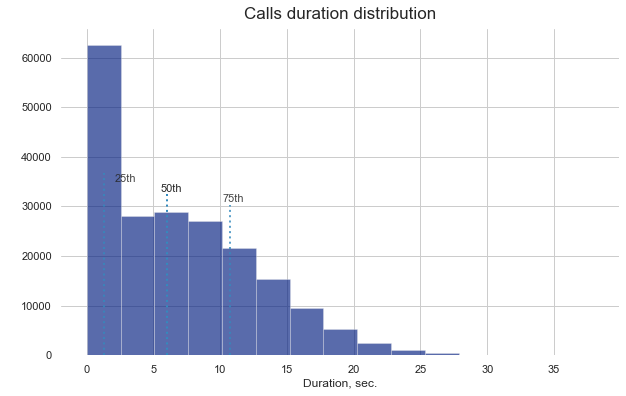

In [13]:
# calls duration (histogram)
fig, ax = plt.subplots(figsize = (10, 6))
plt.style.use('bmh')
ax.grid(False)
calls['duration'].plot(kind = 'hist', bins = 15, alpha = 0.65)
ax.set_xlabel('Duration, sec.')
ax.set_ylabel(' ')
ax.set_title('Calls duration distribution', fontsize=17, pad=10)
ax.tick_params(left = False, bottom = False)
quant_25, quant_50, quant_75= calls['duration'].quantile(0.25), calls['duration'].quantile(0.5), calls['duration'].quantile(0.75)
quants = [[quant_25, 0.8, 0.56], [quant_50, 1, 0.5],  [quant_75, 0.8, 0.46]]
for i in quants:
    plt.axvline(i[0], alpha = i[1], ymax = i[2], linestyle = ":")
plt.text(quant_25+.8, 35000, "25th", size = 11, alpha = 0.85)
plt.text(quant_50-.5, 33000, "50th", size = 11, alpha = 1)
plt.text(quant_75-.5, 31000, "75th", size = 11, alpha = 0.85)
for ax, spine in ax.spines.items():
    spine.set_visible(False);

*Conclusion: since each call is rounded up to minutes (1 second call will be counted as 1 minute), we will round each value up. The distribution is exponential, and we see a lot of zero-duration calls - unanswered calls.*

In [14]:
# round up call duration
calls['duration'] = np.ceil(calls['duration'])
calls.sample(3)

,id,call_date,duration,user_id
20966,1055_459,2018-08-08,1.00,1055
175942,1433_841,2018-03-04,8.00,1433
172218,1425_830,2018-07-21,12.00,1425


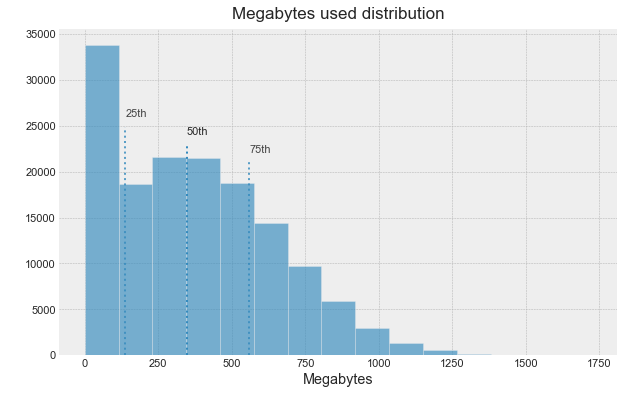

In [15]:
# mb used histogram
fig, ax = plt.subplots(figsize = (10, 6))
plt.style.use('bmh')
ax.grid(False)
internet['mb_used'].plot(kind = 'hist', bins = 15, alpha = 0.65)
ax.set_xlabel('Megabytes')
ax.set_ylabel(' ')
ax.set_title('Megabytes used distribution', fontsize=17, pad=10)
ax.tick_params(left = False, bottom = False)
quant_25, quant_50, quant_75= internet['mb_used'].quantile(0.25),internet['mb_used'].quantile(0.5), internet['mb_used'].quantile(0.75)
quants = [[quant_25, 0.8, 0.7], [quant_50, 1, 0.65],  [quant_75, 0.8, 0.6]]
for i in quants:
    plt.axvline(i[0], alpha = i[1], ymax = i[2], linestyle = ":")
plt.text(quant_25-.13, 26000, "25th", size = 11, alpha = 0.85)
plt.text(quant_50-.13, 24000, "50th", size = 11, alpha = 1)
plt.text(quant_75-.13, 22000, "75th", size = 11, alpha = 0.85)
for ax, spine in ax.spines.items():
    spine.set_visible(False);

*Conclusion: the data is calculated in gigabytes (which are rounded up). Let’s make corresponding calculations. The distribution is exponential (perhaps some users rarely surf the Internet).*

In [16]:
# conversion to GB
tariffs['mb_per_month_included'] = (tariffs['mb_per_month_included']/1024).apply(np.ceil)
tariffs.rename(columns={'mb_per_month_included':'gb_per_month_included'}, inplace=True)
tariffs

,messages_included,gb_per_month_included,minutes_included,rub_monthly_fee,rub_per_gb,rub_per_message,rub_per_minute,tariff_name
0,50,15.00,500,550,200,3,3,smart
1,1000,30.00,3000,1950,150,1,1,ultra


## Interim conclusions

In this section we've:

- drop extra column;
- transformed date and time data to datetime format;
- checked min and max dates;
- processed implicit duplicates (transform to lowercase);
- analyzed numeric data: calls duration and internet traffic distribution;
- transformed calls duration and traffic in appropriate units, rounding values;

# Dataframe editing

Using the new dataframe we now have, we can find for each user:

- the number of calls made and minutes used per month;
- the number of text messages sent per month;
- the volume of data per month;
- the monthly revenue from each user (subtract the free package limit from the total number of calls, text messages, and data; multiply the result by the calling plan value; add the monthly charge depending on the calling plan).

In [17]:
# extract month in a separate column
table_names = [calls, messages, internet]
column_names = ['call_date', 'message_date', 'session_date']

for table, column in zip(table_names, column_names):
    table['month'] = table[column].dt.month
    
# check
[display(table.sample(3, random_state=666)) for table in table_names]

,id,call_date,duration,user_id,month
187177,1462_107,2018-11-11,16.00,1462,11
94394,1239_363,2018-06-17,20.00,1239,6
80220,1200_123,2018-12-17,4.00,1200,12


,id,message_date,user_id,month
101085,1414_29,2018-07-26,1414,7
28535,1123_158,2018-06-04,1123,6
64897,1280_42,2018-09-21,1280,9


,id,mb_used,session_date,user_id,month
39709,1138_387,395.54,2018-08-22,1138,8
55702,1186_167,0.00,2018-12-03,1186,12
90868,1308_51,281.18,2018-10-04,1308,10


[None, None, None]

## Calls count and calls duration

In [18]:
# pivot table - calls count and calls duration (min) by month
pivot_calls = calls.pivot_table(index=['month', 'user_id'], values=['duration'], aggfunc=['count', 'sum'])
pivot_calls.columns = ['calls_cnt', 'calls_sum']
pivot_calls

calls_cnt  calls_sum
month user_id                      
1     1005            15      95.00
      1032            61     380.00
      1045             1       9.00
      1055            64     551.00
      1071            24     194.00
...                  ...        ...
12    1494            62     418.00
      1495           155   1,031.00
      1496            80     518.00
      1497            71     545.00
      1499            69     492.00

[3174 rows x 2 columns]

## Messages count

In [19]:
# pivot table - messages count by month
pivot_msg = messages.pivot_table(index=['month', 'user_id'], values='id', aggfunc='count')
pivot_msg.rename(columns={'id':'msg_cnt'}, inplace=True)
pivot_msg

msg_cnt
month user_id         
1     1005           7
      1032          38
      1045           5
      1055          30
      1071          16
...                ...
12    1493          78
      1495          84
      1496          51
      1497          17
      1499          66

[2717 rows x 1 columns]

## Megabytes count

In [20]:
# pivot table - data used (megabytes) by month
pivot_net = internet.pivot_table(index=['month', 'user_id'], values='mb_used', aggfunc='sum')
pivot_net

mb_used
month user_id          
1     1005     2,727.97
      1032    24,127.69
      1045     2,346.71
      1055    17,090.88
      1071    15,604.34
...                 ...
12    1494    17,621.21
      1495    23,426.76
      1496    20,736.15
      1497    19,918.60
      1499    13,055.58

[3203 rows x 1 columns]

In [21]:
# convert to GB and round up
pivot_net['mb_used'] = np.ceil((pivot_net['mb_used']/1024))
pivot_net.rename(columns={'mb_used':'gb_used'}, inplace=True)
pivot_net

gb_used
month user_id         
1     1005        3.00
      1032       24.00
      1045        3.00
      1055       17.00
      1071       16.00
...                ...
12    1494       18.00
      1495       23.00
      1496       21.00
      1497       20.00
      1499       13.00

[3203 rows x 1 columns]

## Monthly revenue per user

In [22]:
# merging pivot tables
pivot_calls_msg = pivot_calls.merge(pivot_msg, how='outer', on=['user_id', 'month'])
pivot_total = pivot_calls_msg.merge(pivot_net, how='outer', on=['user_id', 'month']).fillna(0)
display(pivot_total)

# check
pivot_total.info()

,,calls_cnt,calls_sum,msg_cnt,gb_used
user_id,month,,,,
1005,1,15.00,95.00,7.00,3.00
1032,1,61.00,380.00,38.00,24.00
1045,1,1.00,9.00,5.00,3.00
1055,1,64.00,551.00,30.00,17.00
1071,1,24.00,194.00,16.00,16.00
...,...,...,...,...,...
1231,12,0.00,0.00,191.00,32.00
1328,12,0.00,0.00,7.00,39.00
1473,12,0.00,0.00,20.00,18.00


<class 'pandas.core.frame.DataFrame'>
MultiIndex: 3214 entries, (1005, 1) to (1476, 4)
Data columns (total 4 columns):
 #   Column     Non-Null Count  Dtype  
---  ------     --------------  -----  
 0   calls_cnt  3214 non-null   float64
 1   calls_sum  3214 non-null   float64
 2   msg_cnt    3214 non-null   float64
 3   gb_used    3214 non-null   float64
dtypes: float64(4)
memory usage: 130.4 KB


In [23]:
# add plan type from users table
pivot_total.reset_index(inplace=True)
pivot_total = pivot_total.merge(users[['user_id', 'tariff']], how='outer', on='user_id')
pivot_total.rename(columns={'tariff':'tariff_name'}, inplace=True)
pivot_total.sample(10, random_state=777)

,user_id,month,calls_cnt,calls_sum,msg_cnt,gb_used,tariff_name
355,1381,4.00,91.00,619.00,40.00,28.00,ultra
469,1453,10.00,132.00,953.00,65.00,29.00,ultra
2245,1366,7.00,28.00,223.00,41.00,12.00,smart
1104,1208,11.00,83.00,559.00,0.00,14.00,ultra
1267,1018,7.00,105.00,760.00,25.00,7.00,ultra
2892,1357,9.00,42.00,342.00,48.00,15.00,smart
2855,1283,11.00,40.00,264.00,19.00,19.00,smart
1605,1384,6.00,80.00,608.00,2.00,22.00,smart
840,1435,12.00,51.00,463.00,0.00,23.00,smart
2049,1066,10.00,83.00,539.00,52.00,16.00,smart


In [24]:
# number of rows check
print(pivot_total.info())
print()
# users check
print('Number of unique users in pivot table:', len(pivot_total['user_id'].unique()))
print('Initial number of unique users:', len(users))

<class 'pandas.core.frame.DataFrame'>
Int64Index: 3216 entries, 0 to 3215
Data columns (total 7 columns):
 #   Column       Non-Null Count  Dtype  
---  ------       --------------  -----  
 0   user_id      3216 non-null   int64  
 1   month        3214 non-null   float64
 2   calls_cnt    3214 non-null   float64
 3   calls_sum    3214 non-null   float64
 4   msg_cnt      3214 non-null   float64
 5   gb_used      3214 non-null   float64
 6   tariff_name  3216 non-null   object 
dtypes: float64(5), int64(1), object(1)
memory usage: 201.0+ KB
None

Number of unique users in pivot table: 500
Initial number of unique users: 500


*Conclusion: there are two rows with NaN in messages, calls and traffic columns. It might be inactive users.*

In [25]:
# inactive users
display(pivot_total.tail(5))
# inactive users data
users.query('user_id == 1128 | user_id == 1371')

,user_id,month,calls_cnt,calls_sum,msg_cnt,gb_used,tariff_name
3211,1328,10.00,0.00,0.00,6.00,22.00,ultra
3212,1328,11.00,0.00,0.00,8.00,35.00,ultra
3213,1328,12.00,0.00,0.00,7.00,39.00,ultra
3214,1128,NaN,NaN,NaN,NaN,NaN,ultra
3215,1371,NaN,NaN,NaN,NaN,NaN,smart


,user_id,age,churn_date,city,first_name,last_name,reg_date,tariff
128,1128,51,2018-12-23,волжский,ксения,агаева,2018-12-15,ultra
371,1371,50,2018-12-30,омск,ириней,трофимов,2018-12-25,smart


In [26]:
# inactive users deletion
pivot_total.drop(pivot_total.index[pivot_total['user_id'] == 1128], inplace = True)
pivot_total.drop(pivot_total.index[pivot_total['user_id'] == 1371], inplace = True)

# check
pivot_total.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 3214 entries, 0 to 3213
Data columns (total 7 columns):
 #   Column       Non-Null Count  Dtype  
---  ------       --------------  -----  
 0   user_id      3214 non-null   int64  
 1   month        3214 non-null   float64
 2   calls_cnt    3214 non-null   float64
 3   calls_sum    3214 non-null   float64
 4   msg_cnt      3214 non-null   float64
 5   gb_used      3214 non-null   float64
 6   tariff_name  3214 non-null   object 
dtypes: float64(5), int64(1), object(1)
memory usage: 200.9+ KB


In [27]:
# add plan info
pivot_total = pivot_total.merge(tariffs, on='tariff_name', how='left')
pivot_total = pivot_total.set_index(['month','user_id'])
pivot_total

,,calls_cnt,calls_sum,msg_cnt,gb_used,tariff_name,messages_included,gb_per_month_included,minutes_included,rub_monthly_fee,rub_per_gb,rub_per_message,rub_per_minute
month,user_id,,,,,,,,,,,,
1.00,1005,15.00,95.00,7.00,3.00,smart,50,15.00,500,550,200,3,3
2.00,1005,69.00,456.00,38.00,8.00,smart,50,15.00,500,550,200,3,3
3.00,1005,77.00,606.00,56.00,11.00,smart,50,15.00,500,550,200,3,3
4.00,1005,101.00,712.00,41.00,10.00,smart,50,15.00,500,550,200,3,3
5.00,1005,73.00,595.00,42.00,8.00,smart,50,15.00,500,550,200,3,3
...,...,...,...,...,...,...,...,...,...,...,...,...,...
11.00,1489,0.00,0.00,20.00,18.00,smart,50,15.00,500,550,200,3,3
12.00,1489,0.00,0.00,35.00,17.00,smart,50,15.00,500,550,200,3,3
10.00,1328,0.00,0.00,6.00,22.00,ultra,1000,30.00,3000,1950,150,1,1


In [28]:
# revenue per user calculation
def profit(df):
    '''
    Subtract the free package limit from the total number of calls, text messages, and data; 
    Multiply the result by the calling plan value; 
    Add the monthly charge depending on the calling plan.
    '''
    minutes = 0
    msgs = 0
    net = 0
    if df['calls_sum'] > df['minutes_included']:
        mintues = (df['calls_sum'] - df['minutes_included']) * df['rub_per_minute']
    if df['msg_cnt'] > df['messages_included']:
        msgs = (df['msg_cnt'] - df['messages_included']) * df['rub_per_message']
    if df['gb_used'] > df['gb_per_month_included']:
        net = (df['gb_used'] - df['gb_per_month_included']) * df['rub_per_gb']
    return minutes + msgs + net + df['rub_monthly_fee']

In [29]:
# apply profit function to df
pivot_total['profit'] = pivot_total.apply(profit, axis=1)
pivot_total.sample(3, random_state=123)

,,calls_cnt,calls_sum,msg_cnt,gb_used,tariff_name,messages_included,gb_per_month_included,minutes_included,rub_monthly_fee,rub_per_gb,rub_per_message,rub_per_minute,profit
month,user_id,,,,,,,,,,,,,
8.00,1183,69.00,579.00,41.00,21.00,smart,50,15.00,500,550,200,3,3,"1,750.00"
9.00,1299,67.00,443.00,45.00,14.00,smart,50,15.00,500,550,200,3,3,550.00
3.00,1118,73.00,547.00,0.00,11.00,smart,50,15.00,500,550,200,3,3,550.00


# Exploratory Data Analysis (EDA)

This section contains calls duration, messages used and data used histograms. The basic quotent: mean, variance and SD are calculated.

In [30]:
# user split between two plans
smart_u = pivot_total.query('tariff_name == "smart"')
ultra_u = pivot_total.query('tariff_name == "ultra"')

## Calls distribution

In [31]:
# статистики
print('\033[1;30;47m_____________SMART PLAN_____________\033[0;0m\n', smart_u['calls_sum'].describe().loc[['mean', 'std']])
print('Variance:', round(np.var( smart_u['calls_sum'], ddof=1), 2))
print('\033[1;30;47m_____________ULTRA PLAN_____________\033[0;0m\n', ultra_u[['calls_sum']].describe().loc[['mean', 'std']])
print('Variance:', round(np.var( ultra_u['calls_sum'], ddof=1), 2))

_____________SMART PLAN_____________
 mean   417.93
std    190.31
Name: calls_sum, dtype: float64
Variance: 36219.32
_____________ULTRA PLAN_____________
       calls_sum
mean     526.62
std      317.61
Variance: 100873.63


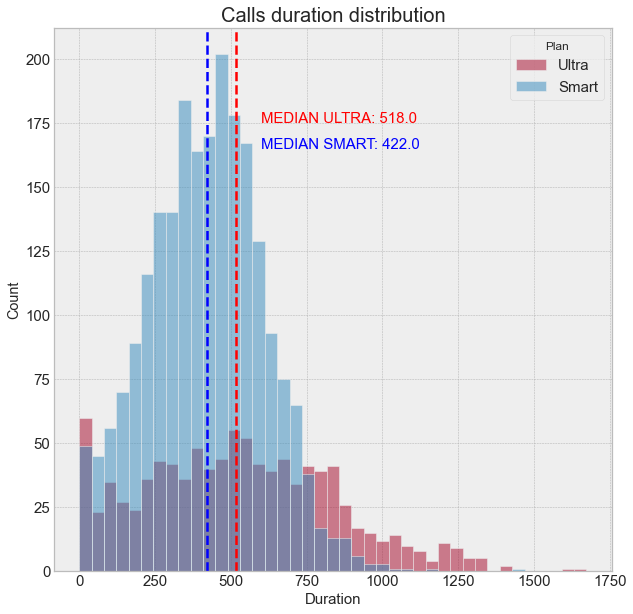

In [32]:
# visualization
sns.histplot(data=pivot_total, hue='tariff_name',x='calls_sum')
plt.title('Calls duration distribution', fontsize=20)
plt.xlabel('Duration', fontsize=15)
plt.tick_params(labelsize=15)
plt.legend(title='Plan', labels=['Ultra', 'Smart'], fontsize=15)
plt.axvline(x=smart_u['calls_sum'].median(), color='blue', ls='--', lw=2.5)
plt.axvline(x=ultra_u['calls_sum'].median(), color='red', ls='--', lw=2.5)
plt.text(600, 175, f'MEDIAN ULTRA: {ultra_u["calls_sum"].median()}', c='red', fontsize=15)
plt.text(600, 165, f'MEDIAN SMART: {smart_u["calls_sum"].median()}', c='blue', fontsize=15);

*Conclusion: data distribution is normal. The histogram of Ultra users is shifted to the right, towards a longer conversation (due to the more amount of minutes included). Smart users on average do not exceed the amount of free minutes.*

## Messages distribution

In [33]:
# statistics
print('\033[1;30;47m_____________SMART PLAN_____________\033[0;0m\n', smart_u['msg_cnt'].describe().loc[['mean', 'std']])
print('Variance:', round(np.var( smart_u['msg_cnt'], ddof=1), 2))
print('\033[1;30;47m_____________ULTRA PLAN_____________\033[0;0m\n', ultra_u[['msg_cnt']].describe().loc[['mean', 'std']])
print('Variance:', round(np.var( ultra_u['msg_cnt'], ddof=1), 2))

_____________SMART PLAN_____________
 mean   33.38
std    28.23
Name: msg_cnt, dtype: float64
Variance: 796.81
_____________ULTRA PLAN_____________
       msg_cnt
mean    49.36
std     47.80
Variance: 2285.27


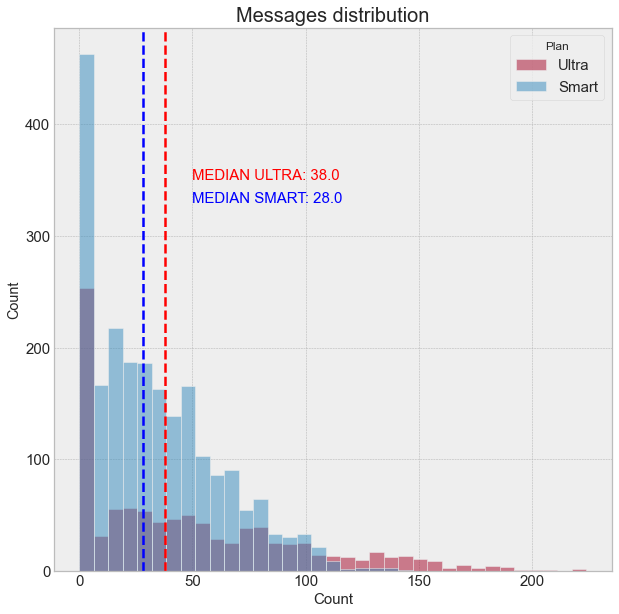

In [34]:
# visualization
sns.histplot(data=pivot_total, hue='tariff_name',x='msg_cnt')
plt.title('Messages distribution', fontsize=20)
plt.xlabel('Count', fontsize=15)
plt.tick_params(labelsize=15)
plt.legend(title='Plan', labels=['Ultra', 'Smart'], fontsize=15)
plt.axvline(x=smart_u['msg_cnt'].median(), color='blue', ls='--', lw=2.5)
plt.axvline(x=ultra_u['msg_cnt'].median(), color='red', ls='--', lw=2.5)
plt.text(50, 350, f'MEDIAN ULTRA: {ultra_u["msg_cnt"].median()}', c='red', fontsize=15)
plt.text(50, 330, f'MEDIAN SMART: {smart_u["msg_cnt"].median()}', c='blue', fontsize=15);

*Conclusion: data distribution is exponential. Clients rarely use SMS (probably it is not popular way to communicate nowadays). Ultra clients did not send more than 200 messages (of 1000 included in plan).*

## Data distribution

In [35]:
# statistics
print('\033[1;30;47m_____________SMART PLAN_____________\033[0;0m\n', smart_u['gb_used'].describe().loc[['mean', 'std']])
print('Variance:', round(np.var( smart_u['gb_used'], ddof=1), 2))
print('\033[1;30;47m_____________ULTRA PLAN_____________\033[0;0m\n', ultra_u[['gb_used']].describe().loc[['mean', 'std']])
print('Variance:', round(np.var( ultra_u['gb_used'], ddof=1), 2))

_____________SMART PLAN_____________
 mean   16.33
std     5.75
Name: gb_used, dtype: float64
Variance: 33.03
_____________ULTRA PLAN_____________
       gb_used
mean    19.49
std      9.85
Variance: 97.09


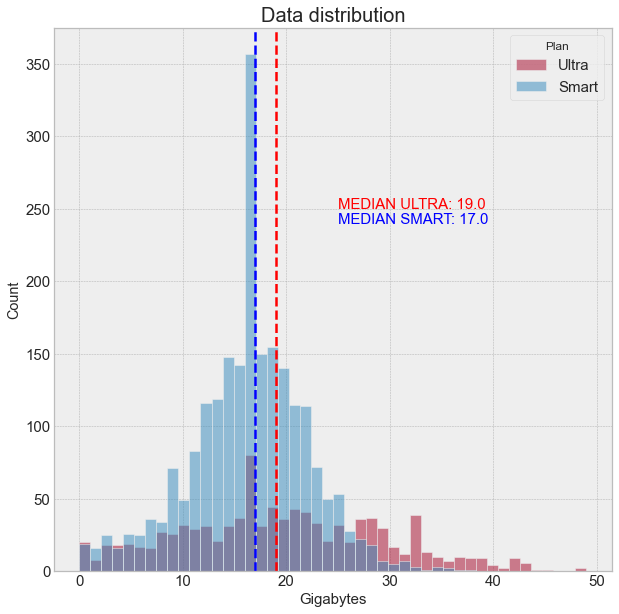

In [36]:
# visualization
sns.histplot(data=pivot_total, hue='tariff_name',x='gb_used')
plt.title('Data distribution', fontsize=20)
plt.xlabel('Gigabytes', fontsize=15)
plt.tick_params(labelsize=15)
plt.legend(title='Plan', labels=['Ultra', 'Smart'], fontsize=15)
plt.axvline(x=smart_u['gb_used'].median(), color='blue', ls='--', lw=2.5)
plt.axvline(x=ultra_u['gb_used'].median(), color='red', ls='--', lw=2.5)
plt.text(25, 250, f'MEDIAN ULTRA: {ultra_u["gb_used"].median()}', c='red', fontsize=15)
plt.text(25, 240, f'MEDIAN SMART: {smart_u["gb_used"].median()}', c='blue', fontsize=15);

*Conclusion: data distribution is normal. The median and average of Smart clients are above the volume of traffic included in the plan. That means clients regularly pay an extra fee for the Internet. 50 GB of Ultra plan is enough for all clients, but rarely someone spends over 40 GB.*

## Interim conclusions

*Calls:*    
Data distribution is normal. The histogram of Ultra users is shifted to the right, towards a longer conversation (due to the more amount of minutes included). Smart users on average do not exceed the amount of free minutes.

*Messages:*   
Data distribution is exponential. Clients rarely use SMS (probably it is not popular way to communicate nowadays). Ultra clients did not send more than 200 messages (of 1000 included in plan).

*Data:*   
Data distribution is normal. The median and average of Smart clients are above the volume of traffic included in the plan. That means clients regularly pay an extra fee for the Internet. 50 GB of Ultra plan is enough for all clients, but rarely someone spends over 40 GB.

# Hypotheses testing

In this section, we will formulate null and alternate hypotheses for testing the following statements:
* average revenue per month vary across Utra and Smart clients;
* average revenue per month vary across clients from Moscow and from regions;

## Average revenue per month vary across Utra and Smart clients.

Null hypothesis **H0** (should contain an equal sign): the average revenue for Ultra clients is equal to the average revenue for Smart clients.    
Alternate hypothesis **H1**: the average revenue vary across Utra and Smart clients.    
Alpha threshold value - 0.05.

In [37]:
# clients churn
chrun_yes = users.query('churn_date == churn_date', engine='python')
display(chrun_yes['tariff'].value_counts().to_frame())

,tariff
smart,23
ultra,15


In [38]:
# revenue statistics
print('\033[1;30;47m_____________SMART PLAN_____________\033[0;0m\n', smart_u['profit'].describe().loc[['mean', 'std']])
print('Variance:', round(np.var( smart_u['profit'], ddof=1), 2))
print('\033[1;30;47m_____________ULTRA PLAN_____________\033[0;0m\n', ultra_u[['profit']].describe().loc[['mean', 'std']])
print('Variance:', round(np.var( ultra_u['profit'], ddof=1), 2))

_____________SMART PLAN_____________
 mean   1,165.16
std      740.56
Name: profit, dtype: float64
Variance: 548424.31
_____________ULTRA PLAN_____________
        profit
mean 2,070.15
std    376.19
Variance: 141516.75


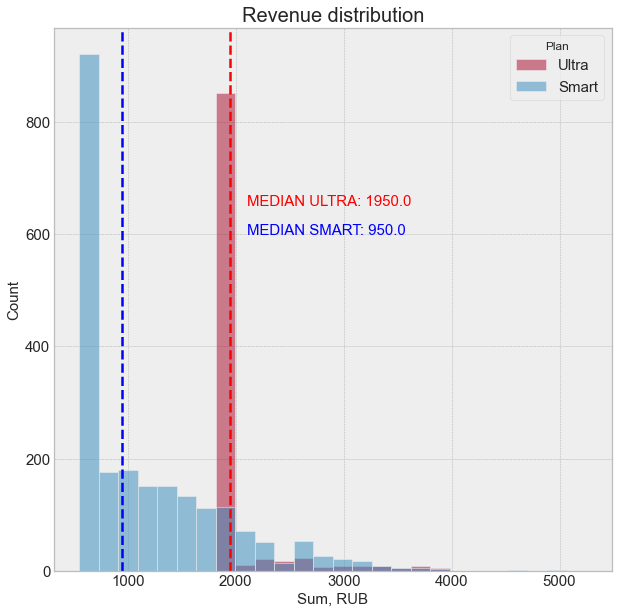

In [39]:
# visualization
sns.histplot(data=pivot_total, hue='tariff_name',x='profit')
plt.title('Revenue distribution', fontsize=20)
plt.xlabel('Sum, RUB', fontsize=15)
plt.ylabel('Count', fontsize=15)
plt.tick_params(labelsize=15)
plt.legend(title='Plan', labels=['Ultra', 'Smart'], fontsize=15)
plt.axvline(x=smart_u['profit'].median(), color='blue', ls='--', lw=2.5)
plt.axvline(x=ultra_u['profit'].median(), color='red', ls='--', lw=2.5)
plt.text(2100, 650, f'MEDIAN ULTRA: {ultra_u["profit"].median()}', c='red', fontsize=15)
plt.text(2100, 600, f'MEDIAN SMART: {smart_u["profit"].median()}', c='blue', fontsize=15);

*Conclusion: data distribution is exponential. The median revenue for Smart clients is almost twice the plan fee. The median for Ultra clients is located in the plan fee zone.*

In [40]:
# number of clients by plan
print('Number of clients, Smart plan:', len(users[users['tariff'] == 'smart']))
print('Number of clients, Ultra plan:', len(users[users['tariff'] == 'ultra']))

Number of clients, Smart plan: 351
Number of clients, Ultra plan: 149


In [41]:
# average revenue per client
print('Average revenue for Smart clients: {:.0f} RUB'.format(smart_u['profit'].sum() / len(users[users['tariff'] == 'smart'])))
print('Average revenue for Ultra clients: {:.0f} RUB'.format(ultra_u['profit'].sum() / len(users[users['tariff'] == 'ultra'])))

Average revenue for Smart clients: 7399 RUB
Average revenue for Ultra clients: 13685 RUB


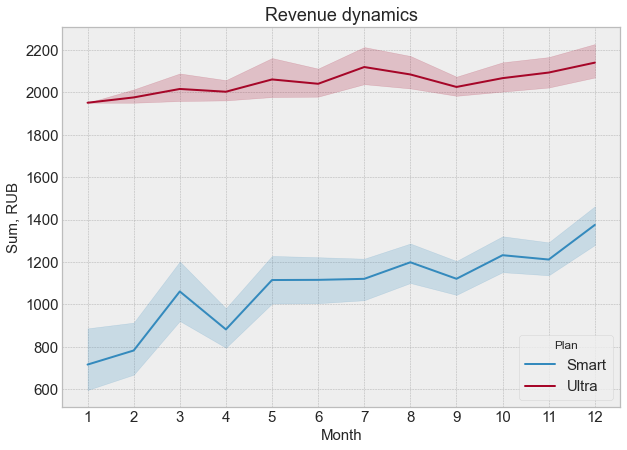

In [42]:
# revenue dynamics
plt.figure(figsize=(10, 7))
sns.lineplot(data=pivot_total, hue='tariff_name', x='month', y='profit')
plt.title('Revenue dynamics', fontsize=18)
plt.xlabel('Month', fontsize=15)
plt.ylabel('Sum, RUB', fontsize=15)
plt.tick_params(labelsize=15)
plt.legend(title='Plan', labels=['Smart', 'Ultra'], fontsize=15)
plt.xticks(np.arange(1, 13, 1));

*Conclusion: we observe faster growth for Smart clients (especially in the first three months). The curve for Ultra clients has smoother growth and there is a decline in September.*

In [43]:
# hypothesis testing
alpha = .05
results = st.ttest_ind(smart_u['profit'], ultra_u['profit'], equal_var=False)
print('p-value:', results.pvalue)
if results.pvalue < alpha:
    print('We reject the null hypohesis')
else:
    print('We fail to reject the null hypothesis')

p-value: 0.0
We reject the null hypohesis


*Conclusion: we accept **H1** - the average revenue vary across Utra and Smart clients.*

## Interim conclusions

- according to the churn table, there are 1.5 Smart clients per one Ultra client  (clients ratio in the sample is 1:2.5). Consequently, Ultra clients churn is higher.
- average revenue from Smart clients is - 1166 RUB, from Ultra clients - 2071 RUB;
- number of Smart clients is 351, Ultra - 149 clients;
- the median and average from Smart clients is around 1000 RUB, and it is almost twice the plan fee;
- the median and average from Ultra clients is around 2000 RUB, and it is around the plan fee;
- average revenue from Smart clients is 7399 RUB, from Ultra - 13685 RUB;
- the dynamics of income during the year shows a faster growth for Smart clients;
- according to the hypothesis testing, we accept H1 - the average revenue vary across Utra and Smart clients.

## Average revenue per month vary across clients from Moscow and from regions.

Null hypothesis **H0**: the average revenue for clients from Moscow is equal to the average revenue for clients from regions.    
Alternate hypothesis **H1**: average revenue per month vary across clients from Moscow and from regions.     
Alpha threshold value - 0.05.

In [44]:
# add city info
pivot_total.reset_index(inplace=True)
pivot_total = pivot_total.merge(users[['user_id', 'city']], how='left', on='user_id')
pivot_total.set_index(['month', 'user_id'])

,,calls_cnt,calls_sum,msg_cnt,gb_used,tariff_name,messages_included,gb_per_month_included,minutes_included,rub_monthly_fee,rub_per_gb,rub_per_message,rub_per_minute,profit,city
month,user_id,,,,,,,,,,,,,,
1.00,1005,15.00,95.00,7.00,3.00,smart,50,15.00,500,550,200,3,3,550.00,набережные челны
2.00,1005,69.00,456.00,38.00,8.00,smart,50,15.00,500,550,200,3,3,550.00,набережные челны
3.00,1005,77.00,606.00,56.00,11.00,smart,50,15.00,500,550,200,3,3,568.00,набережные челны
4.00,1005,101.00,712.00,41.00,10.00,smart,50,15.00,500,550,200,3,3,550.00,набережные челны
5.00,1005,73.00,595.00,42.00,8.00,smart,50,15.00,500,550,200,3,3,550.00,набережные челны
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
11.00,1489,0.00,0.00,20.00,18.00,smart,50,15.00,500,550,200,3,3,"1,150.00",санкт-петербург
12.00,1489,0.00,0.00,35.00,17.00,smart,50,15.00,500,550,200,3,3,950.00,санкт-петербург
10.00,1328,0.00,0.00,6.00,22.00,ultra,1000,30.00,3000,1950,150,1,1,"1,950.00",мурманск


In [45]:
# divide clients from Moscow and from regions
msq = pivot_total.query('city == "москва"', engine='python')
no_msq = pivot_total.query('city != "москва"', engine='python')

In [46]:
# number of clients
print('Number of clients (Moscow):', len(users[users['city'] == 'москва']))
print('Number of clients (regions):', len(users[users['city'] != 'москва']))

Number of clients (Moscow): 99
Number of clients (regions): 401


In [47]:
# статистики выручки
print('\033[1;30;47m_____________MOSCOW_____________\033[0;0m\n', msq['profit'].describe().loc[['mean', 'std']])
print('Variance:', round(np.var(msq['profit'], ddof=1), 2))
print('\033[1;30;47m_____________REGION_____________\033[0;0m\n', no_msq[['profit']].describe().loc[['mean', 'std']])
print('Variance:', round(np.var(no_msq['profit'], ddof=1), 2))

_____________MOSCOW_____________
 mean   1,471.94
std      748.79
Name: profit, dtype: float64
Variance: 560690.65
_____________REGION_____________
        profit
mean 1,435.60
std    778.74
Variance: 606440.71


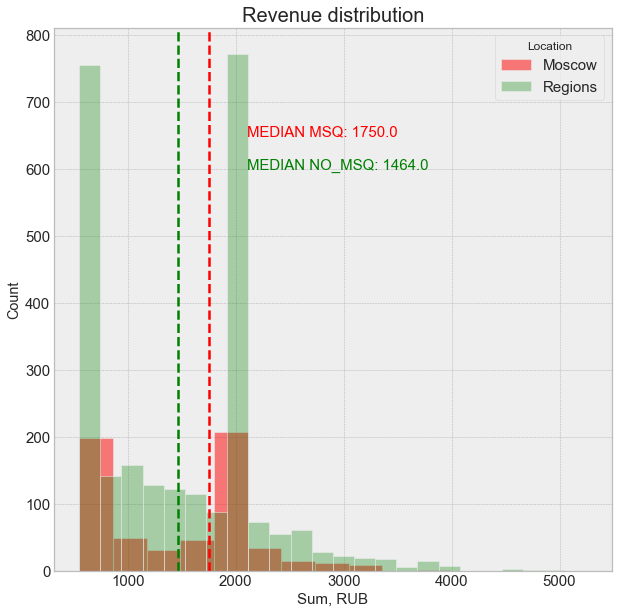

In [48]:
# visualization
sns.histplot(data=msq, x='profit', color='red', alpha=0.5)
sns.histplot(data=no_msq, x='profit', color='green', alpha=0.3)
plt.title('Revenue distribution', fontsize=20)
plt.xlabel('Sum, RUB', fontsize=15)
plt.tick_params(labelsize=15)
plt.legend(title='Location', labels=['Moscow', 'Regions'], fontsize=15)
plt.axvline(x=msq['profit'].median(), color='red', ls='--', lw=2.5)
plt.axvline(x=no_msq['profit'].median(), color='green', ls='--', lw=2.5)
plt.text(2100, 650, f'MEDIAN MSQ: {msq["profit"].median()}', c='red', fontsize=15)
plt.text(2100, 600, f'MEDIAN NO_MSQ: {no_msq["profit"].median()}', c='green', fontsize=15);

*Conclusion: data distribution is exponential. Median revenue from Moscow clients differs from regions by 286 RUB.*

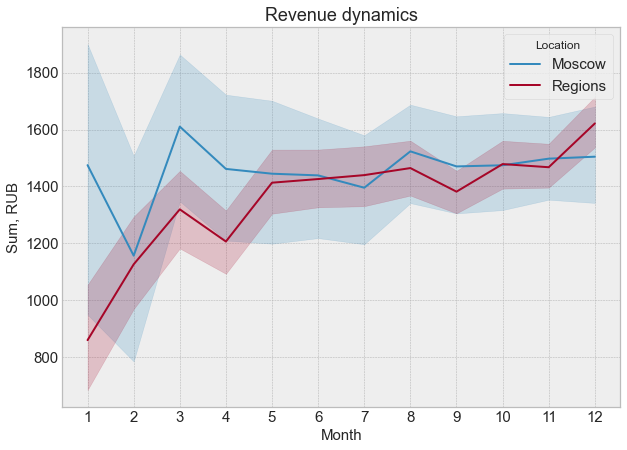

In [49]:
# revenue dynamics
plt.figure(figsize=(10, 7))
sns.lineplot(data=msq, x='month', y='profit')
sns.lineplot(data=no_msq, x='month', y='profit')
plt.title('Revenue dynamics', fontsize=18)
plt.xlabel('Month', fontsize=15)
plt.ylabel('Sum, RUB', fontsize=15)
plt.tick_params(labelsize=15)
plt.legend(title='Location', labels=['Moscow', 'Regions'], fontsize=15)
plt.xticks(np.arange(1, 13, 1));

*Conclusion: at the beginning of the year there was a decline in revenue for both categories, then growth, especially for clients from the regions. In Moscow, there is no clear tendency.*

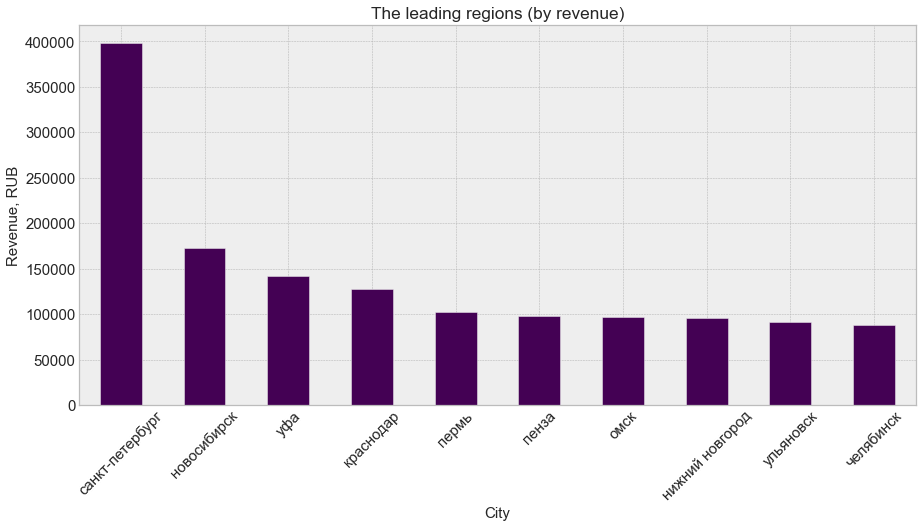

In [50]:
# the leading regions
(no_msq.pivot_table(index='city', 
                    values='profit', 
                    aggfunc='sum')
 .sort_values(by='profit', ascending=False)
 .head(10)
 .plot(figsize=(15, 7), kind='bar', title='The leading regions (by revenue)', legend=False, rot=45, fontsize=15, colormap='viridis'))
plt.xlabel('City', fontsize=15)
plt.ylabel('Revenue, RUB', fontsize=15);

*Conclusion: the leading cities by revenue are St.Petersburg, Novosibirsk, Ufa, Krasnodar.*

In [51]:
# average revenue per client
print('Average revenue for Moscow clients: {:.0f} рублей'.format(msq['profit'].sum() / len(users[users['city'] == 'москва'])))
print('Average revenue for clients from regions: {:.0f} рублей'.format(no_msq['profit'].sum() / len(users[users['city'] != 'москва'])))

Average revenue for Moscow clients: 9084 рублей
Average revenue for clients from regions: 9319 рублей


In [52]:
# проверка гипотезы 
alpha = .05
results = st.ttest_ind(msq['profit'], no_msq['profit'], equal_var = False)
print('p-value:', results.pvalue)
if results.pvalue < alpha:
    print('We reject the null hypohesis.')
else:
    print('We fail to reject the null hypothesis.')

p-value: 0.2843727016644021
We fail to reject the null hypothesis.


*Вывод: We accept **H0** - the average revenue for clients from Moscow is equal to the average revenue for clients from regions.*

## Interim conclusions

- the number of clients from Moscow is 99, from other cities - 401;
- median and average revenue from these two categories are approximately equal: average - approx. 1,500 RUB, median - MSK 1750 RUB., regions 1464 RUB.;
- average revenue from Moscow client is 9084 RUB, from client from the regions - 9319 RUB;
- leading regions by revenue are: Saint-Petersburg, Novosibirsk and Ufa;
- the dynamics of revenue shows greater growth for clients from the regions (especially in the beginning of the year), for clients from Moscow there is no clear tendency;
- according to the hypothesis testing, we accept H0 - the average revenue for clients from Moscow is equal to the average revenue for clients from regions.

# General conclusion

<div style="border:solid green 2px; padding: 20px">
    
In this project, two plans of the Megaline operator were considered: *Smart* and *Ultra*. The goal was to understand which plan brings more money to the operator in order to adjust the advertising budget based on this. The analysis was carried out using data from 500 Megaline users for 2018.  
    
**The main points in data preprocessing:**

- date and time data to datetime format transformation;
- min and max dates check;
- implicit duplicates processing (transform to lowercase);
- numeric data analysis: calls duration and internet traffic distribution;
- transformation of calls duration and data in minutes and gigabytes respectively, rounding values;
    
**Some additional info for each client in dataframe editing section (by month):**
- the number of calls made and minutes used per month;
- the number of text messages sent per month;
- the volume of data per month;
- the monthly revenue from each client;
    
    
**EDA highlights:**
- Ultra clients spend more minutes, messages and Internet traffic, but barely more than the size of their package;
- Smart clients spend less but regularly overpay for the Internet;
- SMS are not popular among all clients (Ultra clinets rarely send more than 200 messages having 1000 included);
- the amount of data included is sufficient for Ultra clients and too small for Smart clients;
 

**Hypotheses testing**
    
- average revenue from Smart clients is - 1166 RUB, from Ultra clients - 2071 RUB;
- number of Smart clients is 351, Ultra - 149 clients;
- the median and average from Smart clients is around 1000 RUB, and it is almost twice the plan fee;
- average revenue from Smart clients is 7399 RUB, from Ultra - 13685 RUB;
- the dynamics of income during the year shows a faster growth for Smart clients;
- the average revenue vary across Utra and Smart clients (5% level of significance);

_________
- the number of clients from Moscow is 99, from other cities - 401;
- median and average revenue from these two categories are approximately equal: average - approx. 1,500 RUB, median - MSK 1750 RUB., regions 1464 RUB.;
- average revenue from Moscow client is 9084 RUB, from client from the regions - 9319 RUB;
- leading regions by revenue are: Saint-Petersburg, Novosibirsk and Ufa;
- the dynamics of revenue shows greater growth for clients from the regions (especially in the beginning of the year), for clients from Moscow there is no clear tendency;
- the average revenue for clients from Moscow is equal to the average revenue for clients from regions (5% level of significance).
    
    
**Recommendations:**
    
Our goal was to find out which plan brings more money to adjust the advertising budget. According to the results of the analysis, the average revenue from the client is higher for the Ultra plan by 5,835 rubles, but these users rarely exceed the plan limits, and the income curve for the year has smoother growth. In addition, there are fewer such clients, which may be due to the higher cost of the tariff. Smart clients regularly overpay for the Internet, the revenue per client is less, but number of clients is larger, the income curve has a sharp increase (let’s assume that advertising companies have not yet been held). With these data, Smart is more cost-effective for the business. However, it is necessary to bear in mind that regular overpayments by users can negatively affect their attitude to the plan, so it is recommended to calculate NPS among Smart clients. According to the churn table, Ultra clients leave more often. 
    
According to the results of the second hypothesis testing, revenues from the regions do not differ from Moscow, although the dynamics of income from clients from regions shows more growth, especially at the beginning of the year. The advertising campaign should focus on Saint Petersburg, Novosibirsk and Ufa. 